## Face Recognition Using Deep CNN

### Importing Required Libraries

In [2]:
# General Libraries
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from glob import glob
import pandas as pd

#Libraries for CNN Model
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense

#Library for improving computation 
import tensorflow as tf

#Library for Creating Dataset
from bing_image_downloader import downloader

#Library for model maintainance
from keras.callbacks import EarlyStopping,ModelCheckpoint

#Library to load model
from keras.models import load_model

#Library for Analysing Model
from sklearn.metrics import confusion_matrix

D:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
D:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
D:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


### Creating Dataset

In [ ]:
downloader.download("gates",limit=500,output_dir="D:\College\College_Projects\MINI_Project III\\Datasets\data\Train")
downloader.download("jack",limit=500,output_dirD:/College Sem V/llege\College_Projects\MINI_Project III\\Datasets\data\Train")
downloader.download("modi",limit=500,output_dir="D:\College\College_Projects\MINI_Project III\\Datasets\data\Train")
downloader.download("musk",limit=500,output_dir="D:\College\College_Projects\MINI_Project III\\Datasets\data\Train")
downloader.download("trump",limit=500,output_dir="D:\College\College_Projects\MINI_Project III\\Datasets\data\Train")

### Analysing Dataset

In [15]:
folders = glob("Datasets/data/Train - Copy/*")
for name in list:
    print(name[27:])

Bill Gates
Donald Trump
Elon Musk
Jack Ma
Narendra Damodar Modi


### Visualising Dataset

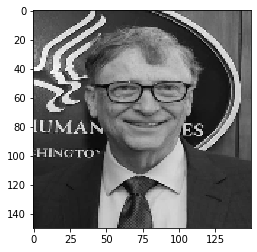

In [2]:
image = cv2.imread('Datasets\data\Train\Bill Gates\gates1.jpg',cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image,[150,150])
plt.imshow(image,cmap='gray')

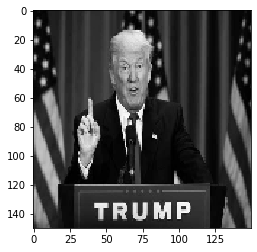

In [9]:
image = cv2.imread('Datasets\data\Train\Donald Trump\donald trump speech101.jpg',cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image,[150,150])
plt.imshow(image,cmap='gray')

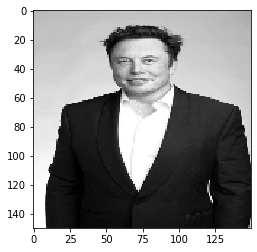

In [10]:
image = cv2.imread('Datasets/data/Train/Elon Musk/musk1.jpg',cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image,[150,150])
plt.imshow(image,cmap='gray')

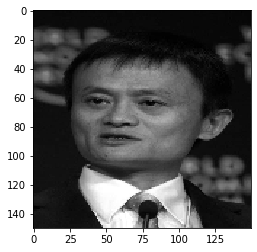

In [12]:
image = cv2.imread('Datasets/data/Train/Jack Ma/jack1.jpg',cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image,[150,150])
plt.imshow(image,cmap='gray')

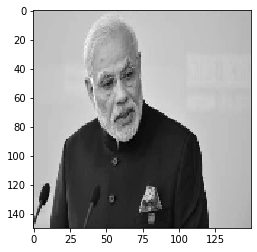

In [14]:
image = cv2.imread('Datasets/data/Train/Narendra Damodar Modi/modi29.jpg',cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image,[150,150])
plt.imshow(image,cmap='gray')

### Importing Data and Converting to Array

In [16]:
##Data Generation for CNN Model
train_X = []
train_y = []
test_X = []
test_y = []
path_train='Datasets\data\Train - Copy'
path_test='Datasets\data\Test'
count=0
img_size=150

def extract(path):
    count=0
    X=[]
    y=[]
    for name in os.listdir(path):
        for p in os.listdir(os.path.join(path,name)):
            person = p.split(".")[0]
            img_array = cv2.imread(os.path.join(os.path.join(path,name),p),cv2.IMREAD_GRAYSCALE)
            new_img_array = cv2.resize(img_array, dsize=(img_size, img_size))
            X.append(new_img_array/255)
            y.append(count)
        count+=1
    X = np.array(X).reshape(-1, img_size,img_size,1)
    y = np.array(y)
    return X,y


train_X,train_y = extract(path_train)
test_X,test_y = extract(path_test)
print(train_X.shape)

(1462, 150, 150, 1)


In [17]:
test_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

### Defining CNN Model

In [10]:
classifier= Sequential()
 
classifier.add(Conv2D(64, kernel_size=(1, 1), strides=(1, 1), input_shape=train_X.shape[1:], activation='relu'))

classifier.add(MaxPool2D(pool_size=(2,2)))

classifier.add(Conv2D(64, kernel_size=(1, 1), strides=(1, 1), activation='relu'))
 
classifier.add(MaxPool2D(pool_size=(2,2)))

classifier.add(Conv2D(64, kernel_size=(1, 1), strides=(1, 1), activation='relu'))
 
classifier.add(MaxPool2D(pool_size=(2,2)))

classifier.add(Conv2D(64, kernel_size=(1, 1), strides=(1, 1), activation='relu'))
 
classifier.add(MaxPool2D(pool_size=(2,2)))

classifier.add(Conv2D(64, kernel_size=(1, 1), strides=(1, 1), activation='relu'))
 
classifier.add(MaxPool2D(pool_size=(2,2)))

classifier.add(Flatten())

classifier.add(Dense(64,activation='relu'))

classifier.add(Dense(len(folders), activation='softmax'))
 
classifier.summary()

classifier.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam', metrics=["accuracy"])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 150, 150, 64)      128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 75, 75, 64)        4160      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 37, 37, 64)        4160      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 18, 18, 64)       

In [12]:
ES = EarlyStopping(monitor='val_accuracy',min_delta=0.01,patience=10,verbose=1)
MCP = ModelCheckpoint('model.h5',monitor='val_accuracy',verbose=3,save_best_only=True)
Callbacks=[ES,MCP]

### Training the Model 

In [13]:
# Starting the model training
classifier.fit(
  train_X,train_y,
  batch_size=len(folders),
  validation_data=(test_X,test_y),
  epochs=50,
  shuffle=True,
  callbacks=Callbacks
  )

Epoch 1/50
293/293 [==============================] - 26s 86ms/step - loss: 1.5183 - accuracy: 0.3078 - val_loss: 1.3761 - val_accuracy: 0.3716

Epoch 00001: val_accuracy improved from -inf to 0.37162, saving model to model.h5
Epoch 2/50
293/293 [==============================] - 26s 90ms/step - loss: 1.3344 - accuracy: 0.4350 - val_loss: 1.1880 - val_accuracy: 0.5203

Epoch 00002: val_accuracy improved from 0.37162 to 0.52027, saving model to model.h5
Epoch 3/50
293/293 [==============================] - 26s 90ms/step - loss: 1.2179 - accuracy: 0.5123 - val_loss: 1.0856 - val_accuracy: 0.5811

Epoch 00003: val_accuracy improved from 0.52027 to 0.58108, saving model to model.h5
Epoch 4/50
293/293 [==============================] - 25s 87ms/step - loss: 1.1212 - accuracy: 0.5472 - val_loss: 0.9808 - val_accuracy: 0.5811

Epoch 00004: val_accuracy did not improve from 0.58108
Epoch 5/50
293/293 [==============================] - 27s 91ms/step - loss: 1.0247 - accuracy: 0.5882 - val_loss:

### Saving the Model

In [49]:
model = load_model('facefeatures_new_model_new.h5')
y_pred = model.predict(test_X)

### Predicting Images uing Model created

In [14]:
y_pred = classifier.predict(test_X)

### Evaluating the Output

In [15]:
ypred = [np.argmax(np.array(y)) for y in y_pred]
ypred = np.array(ypred)
confusion_matrix(test_y,ypred)

array([[40,  0,  0,  0,  0],
       [ 0, 27,  0,  0,  0],
       [ 0,  0, 27,  0,  0],
       [ 0,  0,  0, 27,  0],
       [ 0,  0,  0,  0, 27]], dtype=int64)

In [27]:
## Data Classifier

# from PIL import Image
# from keras.applications.vgg16 import preprocess_input
# import base64
# from io import BytesIO
# import json
# import random
# import cv2
# from keras.models import load_model
# import numpy as np
# from glob import glob

# from keras.preprocessing import image
# model = load_model('facefeatures_new_model_new.h5')

# face_cascade = cv2.CascadeClassifier('frontalface_default.xml')

# def face_extractor(img):
#     img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#     faces = face_cascade.detectMultiScale(img, 1.3, 5)
# #     faces = cv2.cvtColor(faces,cv2.COLOR_BGR2GRAY)
#     if faces is ():
#         return None
#     # Crop all faces found
#     for (x,y,w,h) in faces:
#         cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)
#         cropped_face = img[y:y+h, x:x+w]

#     return cropped_face


# video_capture = cv2.VideoCapture(0)
# i=-1
# while True:
#     _, frame = video_capture.read()
#     #canvas = detect(gray, frame)
#     #image, face =face_detector(frame)
    
#     face=face_extractor(frame)
#     if type(face) is np.ndarray:
#         i+=1
#         face = cv2.resize(face, (img_size, img_size))
#         im = Image.fromarray(face, 'L')
#         img_array = np.array(aaim)
#         img_array = np.expand_dims(img_array, axis=0).reshape(-1, img_size,img_size,1)
#         pred = model.predict(img_array)
#         print(pred)
                     
#         name="None matching"
        
#         folders=glob('Datasets\data\Train\*')
        
#         idx = np.argmax(pred[0])
#         cv2.putText(frame,folders[idx][19:], (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 2)
#     else:
#         cv2.putText(frame,"No face found", (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 2)
#     cv2.imshow('Video', frame)
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break
# video_capture.release()
# cv2.destroyAllWindows()


In [3]:
# Dataset generator

# face_classifier = cv2.CascadeClassifier('frontalface_default.xml')

# def face_extractor(img):    
#     #gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#     face = face_classifier.detectMultiScale(img, 1.3, 5)
#     if face is ():
#         return None
#     for (x,y,w,h) in face:
#         x=x-50
#         y=y-50
#         cropped_face = img[y:y+h+100, x:x+w+100]
#     return cropped_face

# cap = cv2.VideoCapture(0)                                                   # Initialize Webcam
# count = 0
# img_type = input("Enter type pof Image RGB/Gray: ")

# name = input("Enter the Name : ")
# newpath = './Datasets/'+img_type+'/Train/'+name+'/'
# # Collecting 200 samples
# while True:
#     if count%50==0 and count!=0:
#         print("Change the background... Press Enter to continue: ")
#         input()
#     ret, frame = cap.read()
#     if face_extractor(frame) is not None:
#         count += 1
#         face = cv2.resize(face_extractor(frame), (400, 400))
#         if img_type=='Gray':
#             face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
        
#         if not os.path.exists(newpath):
#             os.makedirs(newpath)
        
#         #Storing captured image into the local folder
#         file_name_path = newpath + str(count) + '.jpg'
#         cv2.imwrite(file_name_path, face)

#         # Display image with number of images collected
#         cv2.putText(face, str(count), (100, 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 2)
#         cv2.imshow('Face Founded ', face)
#     else:
#         print("Face not found")
#         pass
#     if cv2.waitKey(1) == 13 or count == 200: #13 is the Enter Key
#         break
        
# cap.release()
# cv2.destroyAllWindows()      
# print("Samples Collection completed for : ",name)


In [37]:
# import sys
# import os
# import glob
# import re
# import numpy as np
# import Images
# import cv2

# # Keras
# from keras.applications.imagenet_utils import preprocess_input, decode_predictions
# from keras.models import load_model
# from keras.preprocessing import image
# from keras.models import load_model

# model = load_model('facefeatures_new_model_new.h5')


# # img = image.load_img("D:\College\College_Projects\MINI_Project III\Datasets\data\Try\gates13.jpg", target_size=(150, 150))
# img = cv2.imread("D:\College\College_Projects\MINI_Project III\Datasets\data\Try\modi13.jpg",cv2.IMREAD_GRAYSCALE)
# img = cv2.resize(img, dsize=(150,150))


# # Preprocessing the image
# x = image.img_to_array(img)
# x = np.true_divide(x, 255)
# x = np.expand_dims(x, axis=0)
# # Be careful how your trained model deals with the input
# # otherwise, it won't make correct prediction!
# # x = preprocess_input(x, mode='caffe')

# preds = model.predict(x)
# print(preds)
# string = "This is an Face of : "+folders[np.argmax(preds)]
# print(string)